In [2]:
%matplotlib inline

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

from Global import Global
from shapely import geometry as geo
import matplotlib.pyplot as plt

In [4]:
""" just returns a test map so that test runs of the planning algorithm may be computed """
def TestMap():
    polyA = geo.Polygon([(40.,30.),
                         (40.,50.),
                         (45.,40.),
                         (45.,35.)])

    polyB = geo.Polygon([(70.,35.),
                         (60.,46.),
                         (50.,63.),
                         (70.,55.)])

    polyC = geo.Polygon([(35.,60.),
                         (35.,70.),
                         (42.,76.),
                         (45.,60.)])

    return [polyA,polyB,polyC]

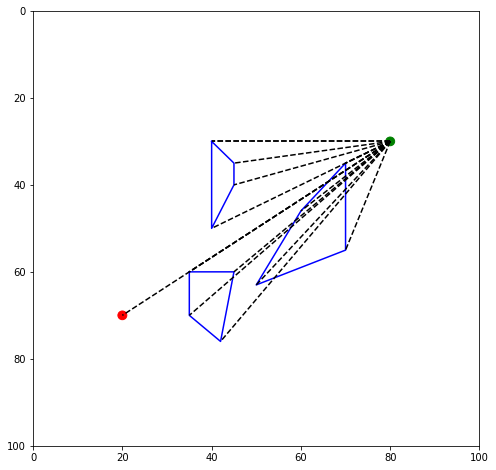

In [43]:
start = (80.,30.)
finish = (20.,70.)

test = Global(TestMap(),start,finish)

test.plot(test.paths())

In [5]:
def plotSegments(segments):
    #plotting parameters
    fsz = 8 # size of the plotted figure
    polyColor = "blue" # color of the map polygons
    startColor = "green" # color of the starting point
    finishColor = "red" # color the the finish point
    debugLineColor = "black"

    #defining a function to plot a polygon :
    #setting map limits
    plt.xlim(0,10)
    plt.ylim(0,10)

    fig = plt.gcf()
    ax = fig.gca()

    ## we need origin to right so we flip the plot
    ax.invert_yaxis()
    fig.set_size_inches((fsz,fsz))

    #Plotting the debug lines
    for line in segments:
        plt.plot([ line[0][0],line[1][0] ],[ line[0][1],line[1][1] ],color="blue")

    #displaying the map
    plt.show()

In [35]:
def intersect(seg1,seg2):
    for i in range(2):
        for j in range(2):
            if(seg1[i]==seg2[j]):
                return False
    line1 = geo.LineString(seg1)
    line2 = geo.LineString(seg2)
    return line1.intersects(line2)
    

no intersect False
intersect True


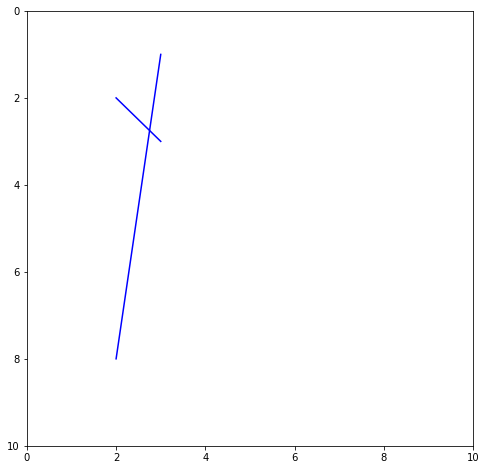

In [36]:
seg1 = [(2.,2.),(3.,3.)]
seg2 = [(1.,5.),(2.,8.)]
seg3 = [(3.,1.),(2.,8.)]



testNoIntersect = [seg1,seg2]
testIntersect = [seg1,seg3]

print("no intersect "+str(intersect(testNoIntersect[0],testNoIntersect[1])))
print("intersect "+str(intersect(testIntersect[0],testIntersect[1])))
plotSegments(testIntersect)

In [37]:
def testIntersect(ax,ay,bx,by):
    seg1 = [(2.,2.),(3.,3.)]
    seg2 = [(ax,ay),(bx,by)]
    plotSegments([seg1,seg2])
    return intersect(seg1,seg2)

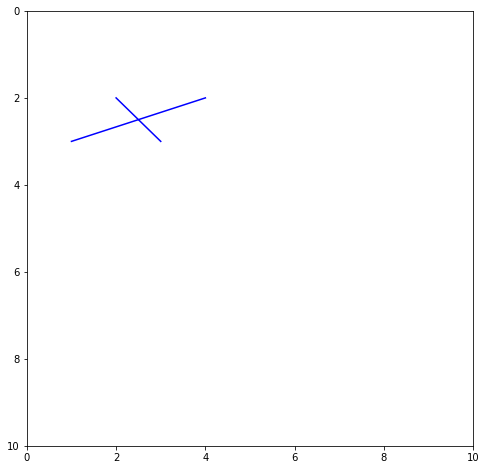

True

In [42]:
testIntersect(4.,2.,1.,3.)